In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Load the data set

In [2]:
df = pd.read_csv("/content/data-set for decision tree.csv")
df

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


#Display basic info and check for missing values

In [6]:
("Dataset shape:", df.shape)
("Missing values:\n", df.isnull().sum())
df.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,0,11,6,0,1,4,0,39,0
1,4,11,6,4,1,4,0,39,0
2,0,15,6,0,4,2,0,39,0
3,4,5,0,7,4,4,0,39,0
4,4,15,5,10,3,4,0,39,0


#Data Preprocessing

In [7]:
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

("Encoded Data:\n", df.head())

('Encoded Data:\n',
    workclass  education  marital.status  occupation  relationship  race  sex  \
 0          0         11               6           0             1     4    0   
 1          4         11               6           4             1     4    0   
 2          0         15               6           0             4     2    0   
 3          4          5               0           7             4     4    0   
 4          4         15               5          10             3     4    0   
 
    native.country  income  
 0              39       0  
 1              39       0  
 2              39       0  
 3              39       0  
 4              39       0  )

#Split Data into Features and Target

In [9]:
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target (the last column)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Decision Tree Model

In [10]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

#Visualize the Decision Tree

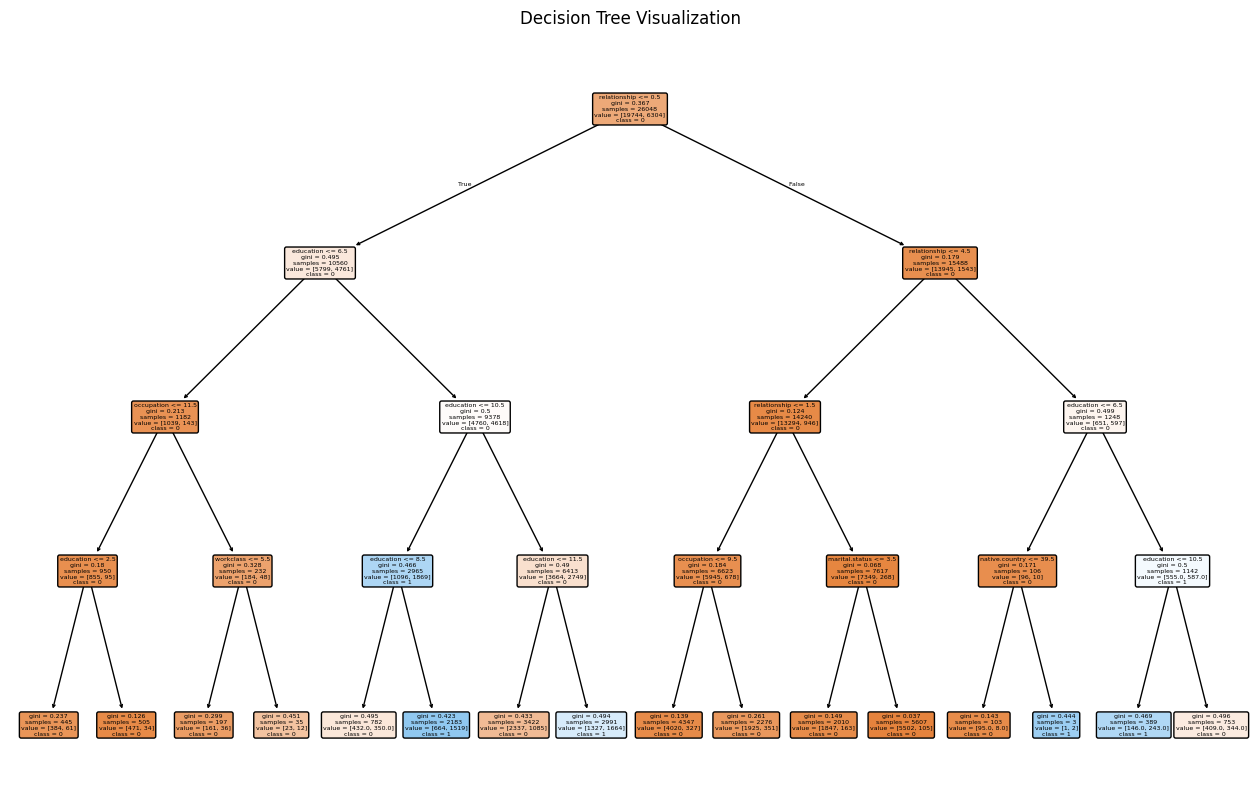

In [14]:
plt.figure(figsize=(16, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=[str(cls) for cls in model.classes_],  # Convert classes to strings
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

 # Predict on the test data

In [15]:
y_pred = model.predict(X_test)

# Accuracy and classification report

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      4976
           1       0.60      0.54      0.57      1537

    accuracy                           0.81      6513
   macro avg       0.73      0.72      0.72      6513
weighted avg       0.80      0.81      0.80      6513



# Confusion matrix

Text(70.72222222222221, 0.5, 'Actual')

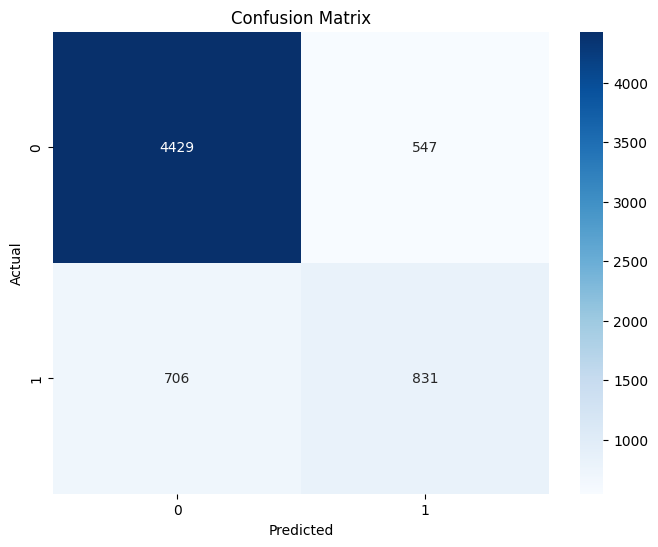

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")